In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plotly_api_key = 'Dns1gp04h4QpiskQPFT3'
chart_studio.tools.set_credentials_file(username= 'thamsuppp', api_key = plotly_api_key)

In [3]:
a = np.zeros((3,3,2))
b = np.zeros((3,3,1))
np.concatenate((a,b), axis = 2).shape

(3, 3, 3)

In [37]:
betas_mean_exp_plot_repeat = np.load('betas_mean_exp_plot_repeat.npy')

In [39]:
betas_mean_exp_plot_repeat

array([[[[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]]],


       [[[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, 

In [36]:
BETAS_ALL = np.load('BETAS_ALL.npy')
BETAS_ALL_MEANS = np.nanmean(BETAS_ALL[:, :-20, :, :, :, :], axis = 1)
BETAS_ALL_MEANS_expand = np.repeat(np.expand_dims(BETAS_ALL_MEANS, axis = 1), BETAS_ALL.shape[1], axis = 1)
BETAS_ALL_2 = BETAS_ALL - BETAS_ALL_MEANS_expand

/tmp/ipykernel_2574/2773831651.py:2: RuntimeWarning: Mean of empty slice
  BETAS_ALL_MEANS = np.nanmean(BETAS_ALL[:, :-20, :, :, :, :], axis = 1)


In [33]:
BETAS_ALL.shape

(12, 247, 4, 60, 3, 3)

In [34]:
BETAS_ALL_2.shape

(12, 247, 4, 60, 3, 3)

In [28]:
BETAS_MEAN[:, :, :, -1]

array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],


In [11]:
X_test_0 = np.load('X_test_0.npy')
X_test_1 = np.load('X_test_1.npy')
X_test_2 = np.load('X_test_2.npy')

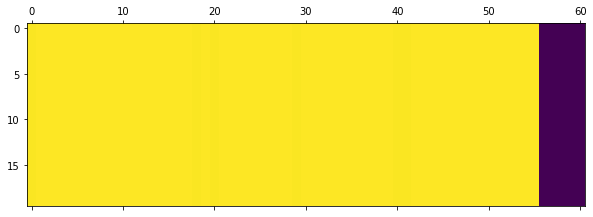

In [4]:
# Plot a heatmap using matplotlib
fig, ax = plt.subplots(figsize = (10, 10))
cax = ax.matshow(X_test_0, cmap = 'viridis')

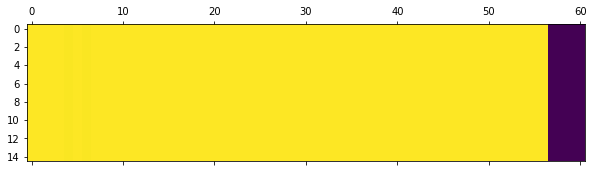

In [10]:
fig, ax = plt.subplots(figsize = (10, 10))
cax = ax.matshow(X_test_1, cmap = 'viridis')

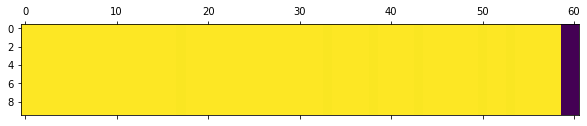

In [12]:
fig, ax = plt.subplots(figsize = (10, 10))
cax = ax.matshow(X_test_2, cmap = 'viridis')

In [8]:
# Load the IRFs
IRFS_MEDIAN_ALL = np.load('results/24oct_test/images/IRFS.npy') # shape: num_exp, n_obs, n_var, n_var, max_h
IRFS_MEDIAN_ALL = IRFS_MEDIAN_ALL[:, :, :2, :2, :]

In [5]:
# Choose 1 experiment
IRFS_median = IRFS_MEDIAN_ALL[0, :,:,:,:]

In [15]:
var_names = ['Var 1', 'Var 2', 'Var 3']

n_exp = IRFS_MEDIAN_ALL.shape[0]
n_var = IRFS_MEDIAN_ALL.shape[2]

    
fig = make_subplots(rows = n_var, cols = n_var,
                    subplot_titles = [f'IRF {var_names[shock_var]} -> {var_names[response_var]}' for response_var in range(n_var) 
                      for shock_var in range(n_var)],
                    specs = [[{'is_3d': True} for e in range(n_var)] for e in range(n_var)],
                    shared_xaxes = False,
                    shared_yaxes = False,
                    horizontal_spacing = 0,
                    vertical_spacing = 0.05
)

cmap = plt.get_cmap("tab10")
colorscale = [[0, 'rgb' + str(cmap(1)[0:3])], 
              [1, 'rgb' + str(cmap(2)[0:3])]]

colors = []
colors_0 = np.zeros(shape = IRFS_MEDIAN_ALL[0, :, 0, 0, :].shape)
colors_1 = np.ones(shape = IRFS_MEDIAN_ALL[0, :, 0, 0, :].shape)
colors.append(colors_0)
colors.append(colors_1)

for shock_var in range(n_var):
  for response_var in range(n_var):
    for exp in range(n_exp):
      fig.add_trace(go.Surface(name = f'Experiment {exp}', z = IRFS_MEDIAN_ALL[exp, :, shock_var, response_var, :], 
            showscale = False, showlegend = True, 
            surfacecolor = colors[exp],
            cmin = 0, cmax = 1,
            opacity = 0.4),
            row = response_var + 1, col = shock_var + 1)

fig.update_scenes(xaxis_title = 'Horizon',
                  yaxis_title = 'Time', 
                  zaxis_title = 'Value',
                  camera = {
                  'up': {'x': 0, 'y': 0, 'z': 1},
                  'center': {'x': 0, 'y': 0, 'z': 0},
                  'eye': {'x': 1.25, 'y': -1.5, 'z': 0.75}
                  })


fig.update_layout(title = f'Conditional IRF', autosize=False,
                  width = 350 * n_var, height = 350 * n_var,
                  margin=dict(l=25, r=25, b=65, t=90))